In [5]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

diamonds = pd.read_csv('/content/gdrive/MyDrive/data/diamonds.csv')
display(diamonds[:4])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


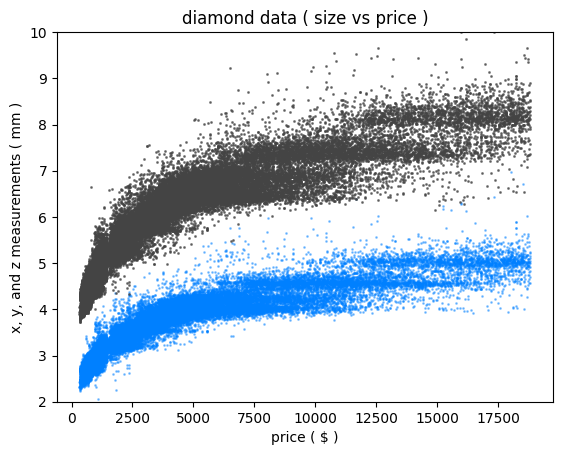

In [40]:
from matplotlib import pyplot as plt

plt.scatter(diamonds.price, diamonds.z, s=1, color="#0080ff", alpha=0.4)
plt.ylim([2, 10])
plt.xlabel("price ( $ )")
plt.ylabel("x, y, and z measurements ( mm )")
plt.title("diamond data ( size vs price )")
plt.scatter(diamonds.price, diamonds.x, s=1, color="#444", alpha=0.4)
plt.scatter(diamonds.price, diamonds.x, s=1, color="#444", alpha=0.4)

## redformat dataframe ( melt, gather )

In [63]:
display(diamonds[:4])

# reformat dataframe ( melt )
diamonds_measurements = pd.melt(diamonds, value_vars=["x", "y", "z"], id_vars=["carat", "cut", "color", "clarity", "depth", "price"], var_name="measurement")
display(diamonds_measurements[:4])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


,carat,cut,color,clarity,depth,price,measurement,value
0,0.23,Ideal,E,SI2,61.5,326,x,3.95
1,0.21,Premium,E,SI1,59.8,326,x,3.89
2,0.23,Good,E,VS1,56.9,327,x,4.05
3,0.29,Premium,I,VS2,62.4,334,x,4.20


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


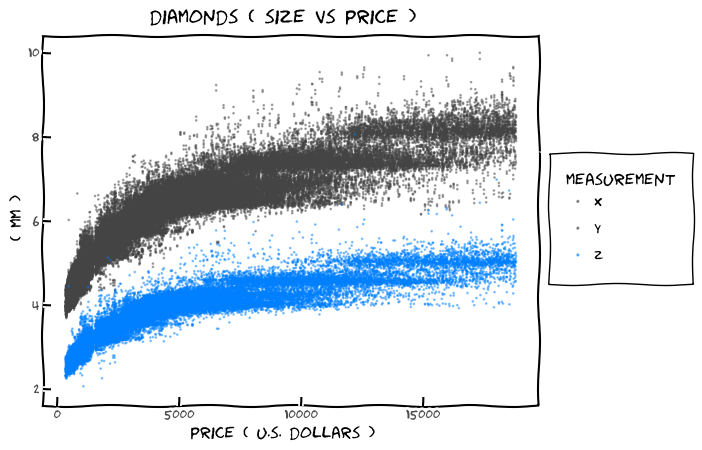

<ggplot: (8752824546662)>

In [90]:
from plotnine.themes.theme_xkcd import theme_xkcd
from plotnine.qplot import labs
from plotnine.scales.limits import lims
from plotnine import ggplot, aes, geom_point, scale_color_manual

p = (ggplot(diamonds_measurements)
    + aes(x="price", y="value", color="measurement")
    + geom_point(size=.1, alpha=0.4)
    + lims(y=(2, 10))
    + scale_color_manual(values = {"x": "#444444", "y": "#444444", "z": "#0080ff"})
    + labs(title="diamonds ( size vs price )", x="price ( u.s. dollars )", y="( mm )")
    + theme_xkcd()
    )
p

In [91]:
p.save(filename="/content/gdrive/MyDrive/data/plotnine_xkcd.png", height=6, width=8, units="in", dpi=300)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /content/gdrive/MyDrive/data/plotnine_xkcd.png
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.
